In [1]:
import mne
import mne.viz
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [2]:
path = "chb15_06.raw.fif"
raw = mne.io.read_raw_fif(path)
print(raw) 
print(raw.info) 
print(raw.ch_names)

Opening raw data file chb15_06.raw.fif...
Isotrak not found
    Range : 0 ... 921599 =      0.000 ...  3599.996 secs
Ready.
<Raw | chb15_06.raw.fif, 38 x 921600 (3600.0 s), ~43 kB, data not loaded>
<Info | 9 non-empty values
 bads: []
 ch_names: FP1-F7, F7-T7, T7-P7, P7-O1, --0, FP1-F3, F3-C3, C3-P3, P3-O1, ...
 chs: 38 misc
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 38
 projs: []
 sfreq: 256.0 Hz
>
['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', '--0', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', '--1', 'FZ-CZ', 'CZ-PZ', 'PZ-OZ', '--2', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', '--3', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2', '--4', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1', '--5', 'FC1-Ref', 'FC2-Ref', 'FC5-Ref', 'FC6-Ref', 'CP1-Ref', 'CP2-Ref', 'CP5-Ref', 'CP6-Ref']


In [3]:
dummy_raw = raw.pick_channels(['F8-T8']).get_data()
print("maximum value is %s" % np.max(dummy_raw))
print("minimum value is %s" % np.min(dummy_raw))

scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
norm = scaler.fit_transform(dummy_raw)
print("maximum_norm value is %s" % np.max(norm))
print("minimum_norm value is %s" % np.min(norm))

maximum value is 0.00020561661222018301
minimum value is -0.00016556776245124638
maximum_norm value is 0.0
minimum_norm value is 0.0


Setting up band-stop filter from 1 - 70 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 70.00 Hz: -6.02, -6.02 dB

 clean data.. [[0.50509884 0.49575199 0.51023083 ... 0.43434787 0.44064989 0.43727308]]
1.0
0.0


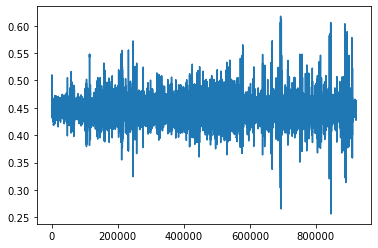

In [7]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

scaled_x = NormalizeData(dummy_raw)
fil_x = mne.filter.filter_data(scaled_x, 256, 70, 1, method='iir')
plt.plot(fil_x[0])
print(f" clean data.. {fil_x}")
print(np.max(scaled_x))
print(np.min(scaled_x))